In [5]:
from sklearn.decomposition import PCA
import torch
import g_arches
import os
import numpy as np

torch.cuda.empty_cache()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
def get_codes(size, hardware = device, hot = True):
    if hot == True:
        return one_hot_embedding(torch.randint(c_dim, size = (size, 1), device = hardware)).float()

    else:
        return torch.randint(c_dim, size = (size, 1), device = hardware)

def one_hot_embedding(labels, hot = True):
    #y = torch.eye(num_classes)
    #return y[labels]
    #return torch.nn.functional.one_hot(labels)[:,1:]

    labels = torch.nn.functional.one_hot(torch.tensor(labels).to(torch.int64), num_classes = c_dim)
    if hot == True:
        return torch.squeeze(labels).to(device)
    else:
        return torch.squeeze(labels).to(device)



v_dim = 100
c_dim = 10
cifar_subset_num = 1000 #2000
directory = '../model_sets/cyc_caegan_cifar/'
#reses = []
G = g_arches.rgb_32_C_AE(v_dim, c_dim)
#G = g_arches.rgb_32_G(v_dim)

num_expirs = 10

reses = torch.zeros((num_expirs,10))
with torch.no_grad():
    for experiment in range(num_expirs):
        i = 0
        for filename in os.listdir(directory):
            print(directory+filename)
            G.load_state_dict(torch.load(directory+filename))
            G = G.eval()
            G = G.to(device)
            v = torch.randn((cifar_subset_num, v_dim, 1, 1), device = device)
            codes = one_hot_embedding(experiment*torch.ones(cifar_subset_num)).view(cifar_subset_num, c_dim, 1, 1).float()

            outputs = G(v, codes).view(cifar_subset_num, -1).cpu()
            #outputs = G(v).view(cifar_subset_num, -1).cpu()
            pca_mod = PCA().fit(outputs)

            cumsums = np.cumsum(pca_mod.explained_variance_ratio_)
            res = next(x for x, val in enumerate(cumsums) 
                                          if val > 0.95)
            print ("The index of element just greater than 0.95 : "
                                                   + str(res))
            reses[experiment, i] = res
            i+=1
            
print(reses)
import winsound
duration = 600  # milliseconds
freq = 350  # Hz
winsound.Beep(freq, duration)

cuda


FileNotFoundError: [WinError 3] The system cannot find the path specified: '../model_sets/cyc_caegan_cifar/'

In [ ]:
print(reses.shape)
# 1 row = 1 batch of a model
# 1 col = a model thru experiments (classes 0,...9)

In [ ]:
print(reses.sum(dim=1))

In [ ]:
torch.save(reses, 'cyc_caegan_class_dims.pt')

In [ ]:
import matplotlib.pyplot as plt
import os
import torch
names = ['ACGAN', 'CAEGAN', 'CCAEGAN', 'CGAN', 'ICAEGAN']
i=0
for filename in os.listdir():
    if filename.endswith('class_dims.pt'):
        print(filename)
        file = torch.load(filename)
        print(file.sum(dim=1))
        plt.scatter(range(10), file.sum(dim=1) / 10, label = names[i])
        i+=1
plt.ylabel('Estimated Class Manifold Dimension')
classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
plt.xlabel(classes)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('')
plt.legend(loc = 'best')
#plt.rcParams["figure.figsize"] = (9,10)
plt.show()

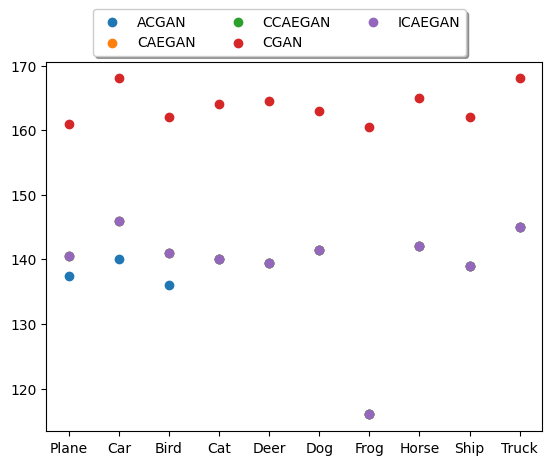

In [32]:
# import matplotlib.pyplot as plt

# inds = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# cgan = [161, 168, 162, 164, 164.5, 163, 160.5, 165, 162, 168]
# icaegan = [140.5, 146, 141, 140, 139.5, 141.5, 116, 142, 139, 145]

# acgan = [137.5, 140, 136, 135, 139.5, 141.5, 116, 142, 139, 145]
# ccaegan = [140.5, 146, 141, 140, 139.5, 141.5, 116, 142, 139, 145]
# caegan = [140.5, 146, 141, 140, 139.5, 141.5, 116, 142, 139, 145]

# plt.scatter(inds, acgan, label = 'ACGAN')
# plt.scatter(inds, caegan, label = 'CAEGAN')
# plt.scatter(inds, ccaegan, label = 'CCAEGAN')
# plt.scatter(inds, cgan, label = 'CGAN')
# plt.scatter(inds, icaegan, label = 'ICAEGAN')
# plt.legend(loc='upper center', bbox_to_anchor=(0.47, 1.16),
#           ncol=3, fancybox=True, shadow=True)
# plt.show()